In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
#Loading Data
df_BEA = pd.read_csv('../data/BEA.csv')
df_BLS = pd.read_csv('../data/BLS.csv')

In [3]:
#dtypes BEA
df_BEA.dtypes

TimePeriod                                                  object
Gross domestic product                                      object
Personal consumption expenditures                           object
Gross private domestic investment                           object
Change in private inventories                               object
Exports                                                     object
Imports                                                     object
Government consumption expenditures and gross investment    object
Residual                                                    object
Net exports of goods and services                           object
Goods                                                       object
Services                                                    object
Durable goods                                               object
Nondurable goods                                            object
Fixed investment                                            ob

In [4]:
#Missing data form BEA
df_BEA.isnull().sum()

TimePeriod                                                    0
Gross domestic product                                        0
Personal consumption expenditures                             0
Gross private domestic investment                             0
Change in private inventories                                 0
Exports                                                       0
Imports                                                       0
Government consumption expenditures and gross investment      0
Residual                                                      0
Net exports of goods and services                            92
Goods                                                        92
Services                                                     92
Durable goods                                               220
Nondurable goods                                            220
Fixed investment                                            220
Nonresidential                          

# Cleaning BEA data
The data types are not the create format for model. I will need to change the types to be numerical. Also, I will need to set the index to time with quaters as the base. For missing data points, I will be dropping the columns in question because they are newer data that has been collected data bpoints collected by the BEA.

In [5]:
#Dropps columns with missing data
cols = ['Net exports of goods and services', 'Goods', 'Services', 'Durable goods', 'Nondurable goods', 'Fixed investment', 'Nonresidential', 'Structures', 'Equipment','Intellectual property products','Residential','Federal', 'National defense', 'Nondefense', 'State and local', 'Change in private inventories']
df_BEA.drop(columns=cols, inplace=True)

In [6]:
# Converts the coloumsn from an object to a float
def to_float(x):
    return float(x.replace(',',''))

In [7]:
#Converts the data to floats
cols = ['Gross domestic product','Personal consumption expenditures','Gross private domestic investment', 'Exports', 'Imports','Government consumption expenditures and gross investment', 'Residual'] 
for i in cols:
    df_BEA[i] = df_BEA[i].map(to_float)

In [8]:
#Function to convert Qs to there end data.
def to_q_end_date(x):
    if x[-2:] == 'Q1':
        return x.replace('Q1','-03-31')
    elif x[-2:] == 'Q2':
        return x.replace('Q2','-06-30')
    elif x[-2:] == 'Q3':
        return x.replace('Q3','-09-30')
    elif x[-2:] == 'Q4':
        return x.replace('Q4','-12-31')
    else:
        return x   

In [9]:
#Converting the quarter data
df_BEA['TimePeriod'] = df_BEA['TimePeriod'].map(to_q_end_date)

In [10]:
#New column names dictionary
col_names ={
    'Gross domestic product':'gdp',
    'Personal consumption expenditures':'consumption',
    'Gross private domestic investment':'investment',
    'Change in private inventories' : 'delta_inventory', 
    'Government consumption expenditures and gross investment':'government_spending'
}

In [11]:
#renaming coloumns
df_BEA.rename(columns=col_names, inplace=True)

In [12]:
# Change date column to be datetime dtype
df_BEA['TimePeriod'] = pd.to_datetime(df_BEA['TimePeriod'])

In [13]:
# Set TimePeriod to be in the index
df_BEA.set_index('TimePeriod',inplace = True)

In [14]:
# Sort the index
df_BEA.sort_index(inplace=True)

In [15]:
#remove top and right spines
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

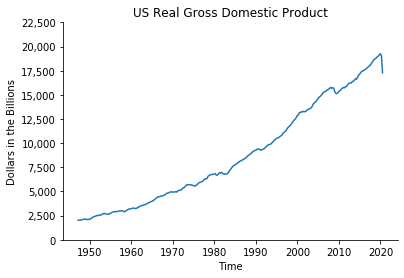

In [18]:
#plot gdp
plt.plot(df_BEA['gdp'])
#plt.plot(df_BEA['gdp'].rolling(4).mean())
plt.title('US Real Gross Domestic Product')
plt.xlabel('Time')
locs, labels = plt.yticks() 
plt.yticks(locs, ['0', '2,500', '5,000', '7,500', '10,000', '12,500','15,000', '17,500', '20,000', '22,500'])
plt.ylabel('Dollars in the Billions')
plt.savefig('../assets/RGDP.png', dpi=300);

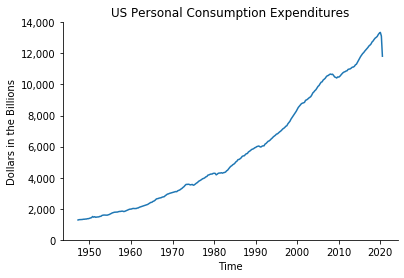

In [17]:
#plot Consumption
plt.plot(df_BEA['consumption'])
plt.title('US Personal Consumption Expenditures')
plt.xlabel('Time')
locs, labels = plt.yticks()
plt.yticks(locs, ['0', '2,000',  '4,000',  '6,000',  '8,000', '10,000','12,000', '14,000'])
plt.ylabel('Dollars in the Billions');

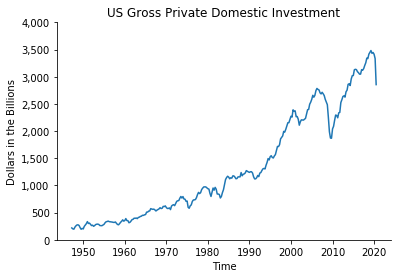

In [18]:
#plot investment
plt.plot(df_BEA['investment'])
plt.title('US Gross Private Domestic Investment')
plt.xlabel('Time')
locs, labels = plt.yticks()
plt.yticks(locs, ['0', '500', '1,000', '1,500', '2,000', '2,500','3,000', '3,500', '4,000'])
plt.ylabel('Dollars in the Billions');

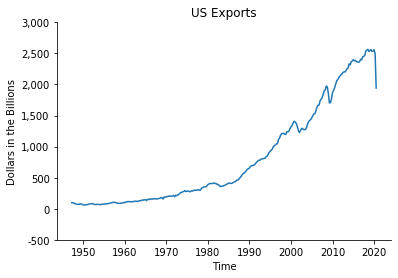

In [19]:
#plot Exports
plt.plot(df_BEA['Exports'])
plt.title('US Exports')
plt.xlabel('Time')
locs, labels = plt.yticks()
plt.yticks(locs, ['-500', '0',  '500', '1,000', '1,500', '2,000','2,500', '3,000'])
plt.ylabel('Dollars in the Billions');

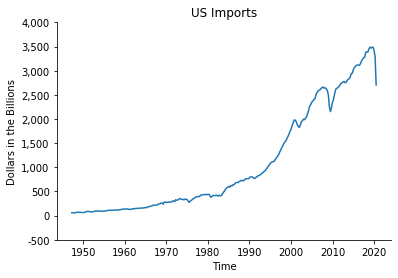

In [20]:
plt.plot(df_BEA['Imports'])
plt.title('US Imports')
plt.xlabel('Time')
locs, labels = plt.yticks()
plt.yticks(locs, ['-500','0',  '500', '1,000', '1,500', '2,000','2,500', '3,000', '3,500', '4,000'])
plt.ylabel('Dollars in the Billions');

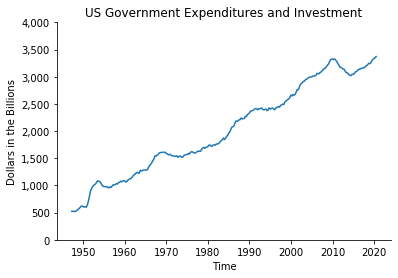

In [21]:
plt.plot(df_BEA['government_spending'])
plt.title('US Government Expenditures and Investment')
plt.xlabel('Time')
locs, labels = plt.yticks();
plt.yticks(locs, ['0',  '500', '1,000', '1,500', '2,000', '2,500','3,000', '3,500', '4,000'])
plt.ylabel('Dollars in the Billions');

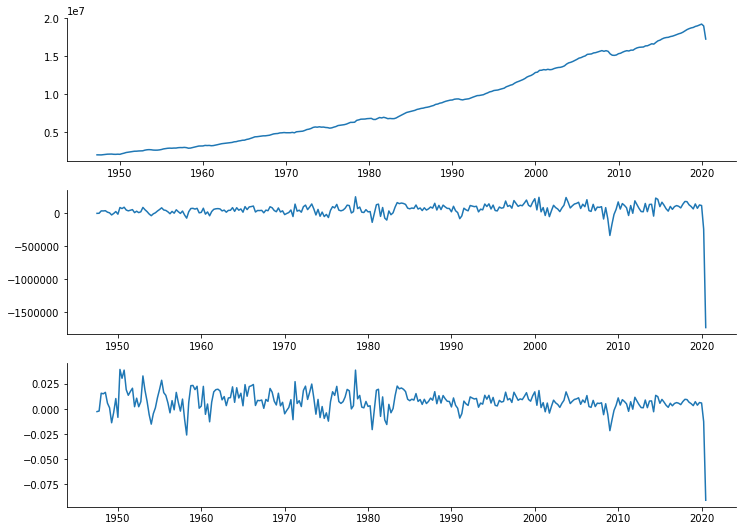

In [22]:
#gdp
fig, axes = plt.subplots(nrows=3, figsize=(12,9))

axes[0].plot(df_BEA['gdp'])
axes[1].plot(df_BEA['gdp'].diff())
axes[2].plot(df_BEA['gdp'].pct_change())

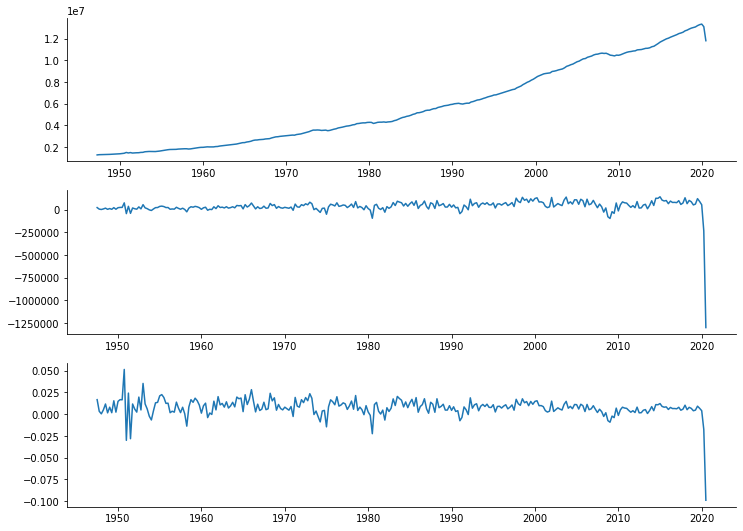

In [23]:
#consumption
fig, axes = plt.subplots(nrows=3, figsize=(12,9))

axes[0].plot(df_BEA['consumption'])
axes[1].plot(df_BEA['consumption'].diff())
axes[2].plot(df_BEA['consumption'].pct_change());

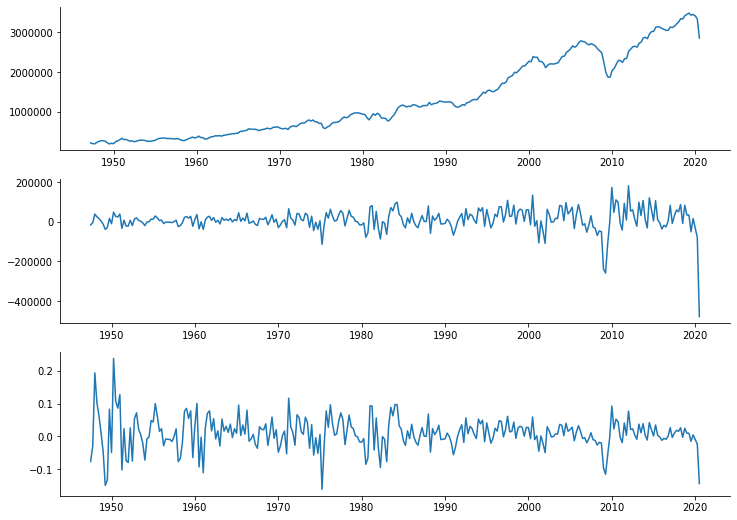

In [24]:
#investment
fig, axes = plt.subplots(nrows=3, figsize=(12,9))

axes[0].plot(df_BEA['investment'])
axes[1].plot(df_BEA['investment'].diff())
axes[2].plot(df_BEA['investment'].pct_change());

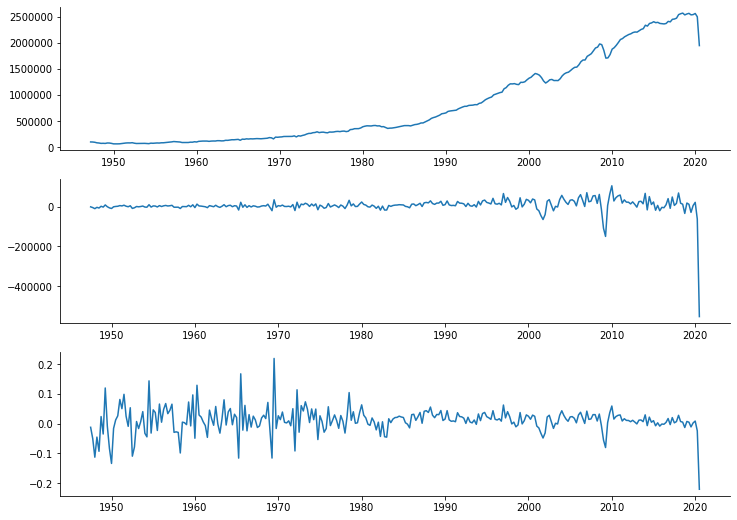

In [25]:
#Exports
fig, axes = plt.subplots(nrows=3, figsize=(12,9))

axes[0].plot(df_BEA['Exports'])
axes[1].plot(df_BEA['Exports'].diff())
axes[2].plot(df_BEA['Exports'].pct_change());

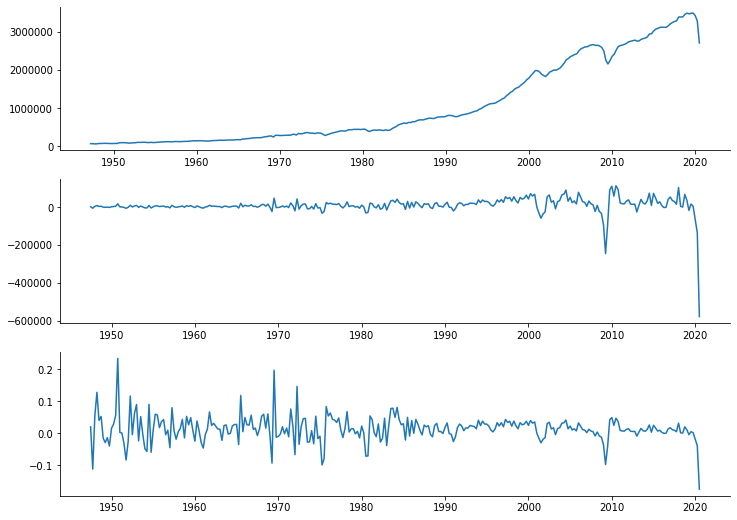

In [26]:
#Imports
fig, axes = plt.subplots(nrows=3, figsize=(12,9))

axes[0].plot(df_BEA['Imports'])
axes[1].plot(df_BEA['Imports'].diff())
axes[2].plot(df_BEA['Imports'].pct_change());

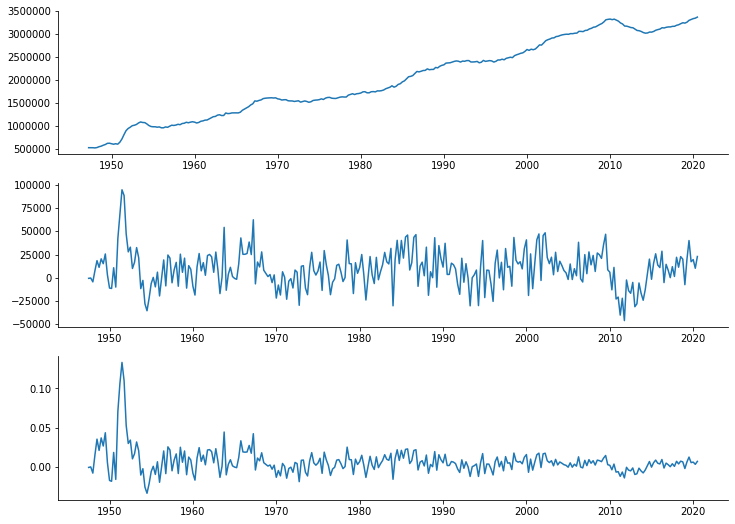

In [27]:
#government_spending
fig, axes = plt.subplots(nrows=3, figsize=(12,9))

axes[0].plot(df_BEA['government_spending'])
axes[1].plot(df_BEA['government_spending'].diff())
axes[2].plot(df_BEA['government_spending'].pct_change());

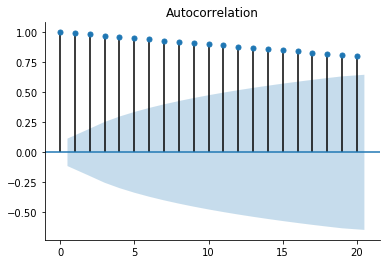

In [28]:
# Generate the ACF plot on gdp data
# up to 20 time periods.
plot_acf(df_BEA['gdp'], lags=20);

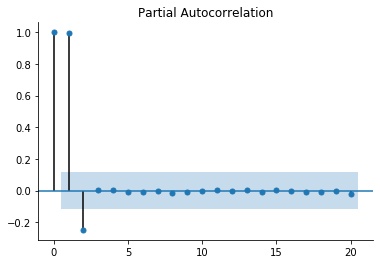

In [29]:
# Generate the PACF plot on gdp data
# up to 20 time periods.
plot_pacf(df_BEA['gdp'], lags=20);

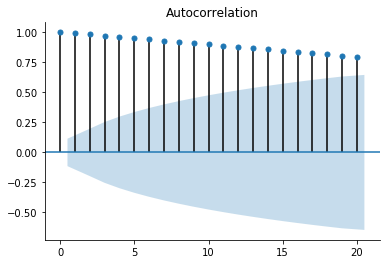

In [30]:
# Generate the ACF plot on consumption data
# up to 20 time periods.
plot_acf(df_BEA['consumption'], lags=20);

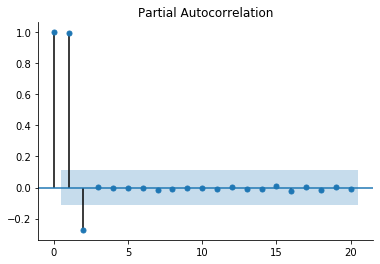

In [31]:
# Generate the PACF plot on consumption data
# up to 20 time periods.
plot_pacf(df_BEA['consumption'], lags=20);

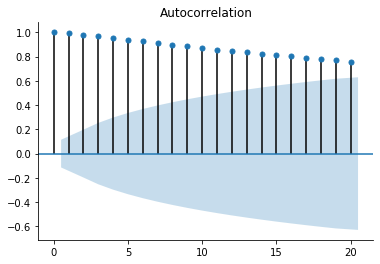

In [32]:
# Generate the ACF plot on investment data
# up to 20 time periods.
plot_acf(df_BEA['investment'], lags=20);

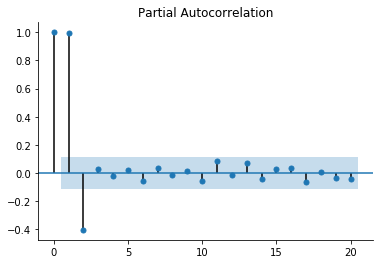

In [33]:
# Generate the PACF plot on investment data
# up to 20 time periods.
plot_pacf(df_BEA['investment'], lags=20);

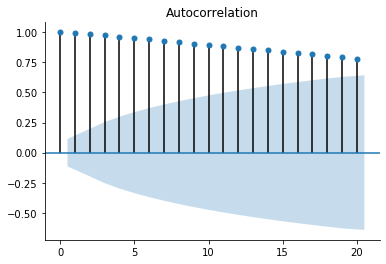

In [34]:
# Generate the ACF plot on Exports data
# up to 20 time periods.
plot_acf(df_BEA['Exports'], lags=20);

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


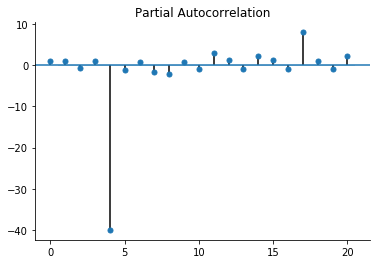

In [35]:
# Generate the PACF plot on Exports data
# up to 20 time periods.
plot_pacf(df_BEA['Exports'], lags=20);

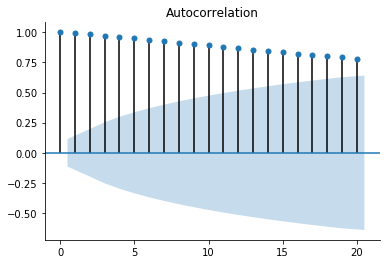

In [36]:
# Generate the ACF plot on Exports data
# up to 20 time periods.
plot_acf(df_BEA['Imports'], lags=20);

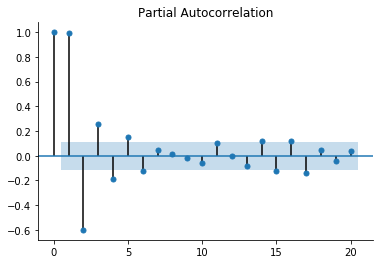

In [37]:
# Generate the PACF plot on Imports data
# up to 20 time periods.
plot_pacf(df_BEA['Imports'], lags=20);

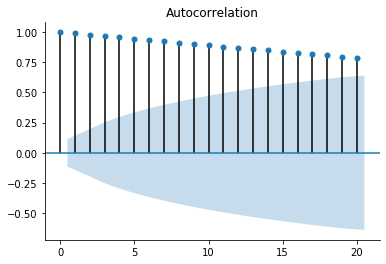

In [38]:
# Generate the ACF plot on government_spending data
# up to 20 time periods.
plot_acf(df_BEA['government_spending'], lags=20);

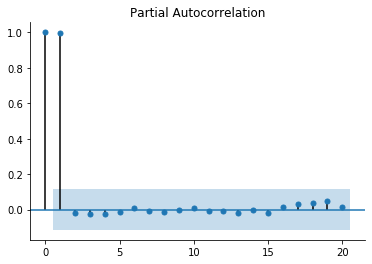

In [39]:
# Generate the PACF plot on government_spending data
# up to 20 time periods.
plot_pacf(df_BEA['government_spending'], lags=20);

In [21]:
#percent change of gdp anualized
df_BEA['gdp_percent_delta'] = (((1+df_BEA['gdp'].pct_change())**4)-1)*100

In [22]:
#percent change of Consumption anualized
df_BEA['consumption_pct_delta'] = (((1+df_BEA['consumption'].pct_change())**4)-1)*100

In [23]:
#percent change of investment 
df_BEA['investment_pct_delta'] = (((1+df_BEA['investment'].pct_change())**4)-1)*100

In [24]:
#percent change of Exports 
df_BEA['Exports_percent_delta'] = (((1+df_BEA['Exports'].pct_change())**4)-1)*100

In [25]:
#percent change of Imports 
df_BEA['Imports_percent_delta'] = (((1+df_BEA['Imports'].pct_change())**4)-1)*100

In [26]:
#percent change of Imports 
df_BEA['government_spending_percent_delta'] = (((1+df_BEA['government_spending'].pct_change())**4)-1)*100

In [27]:
#percent change of the percent change gdp
df_BEA['gdp_percent_2delta'] = df_BEA['gdp'].pct_change().pct_change()

In [28]:
#percent change of the percent change of Consumption 
df_BEA['consumption_pct_2delta'] = df_BEA['consumption'].pct_change().pct_change()

In [29]:
#percent change of the percent change investment 
df_BEA['investment_pct_2delta'] = df_BEA['investment'].pct_change().pct_change()

In [30]:
#percent change of the percent change Exports 
df_BEA['Exports_pct_2delta'] = df_BEA['Exports'].pct_change().pct_change()

In [31]:
#percent change of the percent change Exports 
df_BEA['government_spending_pct_2delta'] = df_BEA['government_spending'].pct_change().pct_change()

In [32]:
# Dummy for negative growth
def negative_change(x):
    if np.isnan(x):
        return x
    else:
        if x < 0:
            return 1
        else:
            return 0  

In [33]:
df_BEA['negative_growth'] = df_BEA['gdp_percent_delta'].map(negative_change)

In [34]:
# (df_BEA['gdp_percent_delta'] < 0) & (df_BEA['gdp_percent_delta'].shift(-1) < 0)

In [35]:
# recession_start = False
# recession_gdp = 0
# quarter = {'start': None, 'end': None, 'min': None}
# min_gdp = 10000


# final_list = []


# for i, row in df_BEA['gdp_percent_delta'].iterrows():

#     if row['change'] < 0 and not recession_start:
#         recession_start = True
#         recession_gdp = frame[i - 1]['gdp']
#         quarter['start'] = row['quarter']

#     if row['gdp'] < min_gdp and recession_start:
#         min_gdp = row['gdp']
#         quarter['min'] = row['quarter']

#     if recession_start and row['gdp'] >= recession_gdp:
#         quarter['end'] = row['quarter']
#         final_list.append(quarter)
#         # reset all values
#         recession_start = False
#         recession_gdp = 0
#         quarter = {'start': None, 'end': None, 'min': None}

#         min_quarter = None
#         min_gdp = 10000

In [36]:
#Classification balance
df_BEA['negative_growth'].value_counts(normalize=True)

0.0    0.853242
1.0    0.146758
Name: negative_growth, dtype: float64

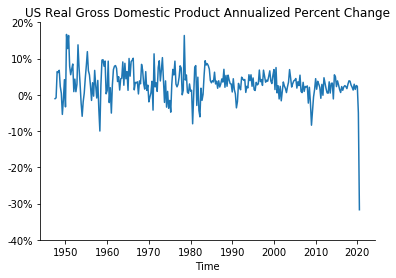

In [37]:
#plot gdp pecent changed annualized
plt.plot(df_BEA['gdp_percent_delta'])
plt.title('US Real Gross Domestic Product Annualized Percent Change')
plt.xlabel('Time')
locs, labels = plt.yticks() 
plt.yticks(locs, ['-40%', '-30%', '-20%', '-10%', '0%', '10%','20%'])
plt.savefig('../assets/RGDPPCT.png', dpi=300);

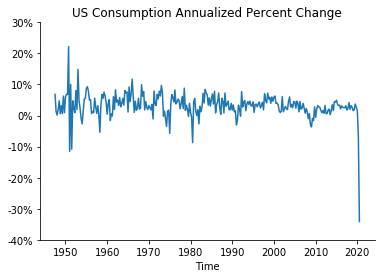

In [57]:
#plot Consumption pecent changed annualized
plt.plot(df_BEA['consumption_pct_delta'])
plt.title('US Consumption Annualized Percent Change')
plt.xlabel('Time')
locs, labels = plt.yticks() 
plt.yticks(locs, ['-40%', '-30%', '-20%', '-10%', '0%', '10%','20%', '30%']);

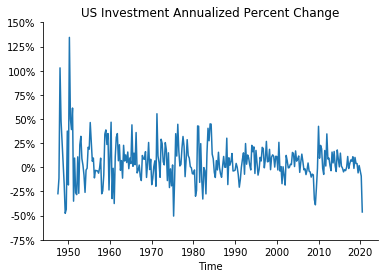

In [58]:
#plot investment pecent changed annualized
plt.plot(df_BEA['investment_pct_delta'])
plt.title('US Investment Annualized Percent Change')
plt.xlabel('Time')
locs, labels = plt.yticks() 
plt.yticks(locs, ['-75%', '-50%', '-25%', '0%', '25%', '50%','75%', '100%','125%','150%']);

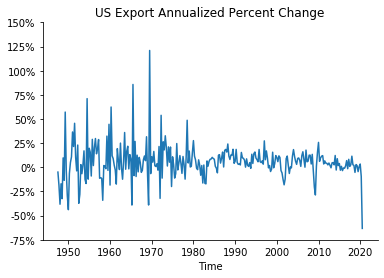

In [59]:
#plot export pecent changed annualized
plt.plot(df_BEA['Exports_percent_delta'])
plt.title('US Export Annualized Percent Change')
plt.xlabel('Time')
locs, labels = plt.yticks() 
plt.yticks(locs, ['-75%', '-50%', '-25%', '0%', '25%', '50%','75%', '100%','125%','150%']);

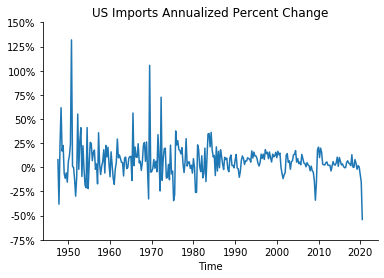

In [60]:
#plot Imports pecent changed annualized
plt.plot(df_BEA['Imports_percent_delta'])
plt.title('US Imports Annualized Percent Change')
plt.xlabel('Time')
locs, labels = plt.yticks() 
plt.yticks(locs, ['-75%', '-50%', '-25%', '0%', '25%', '50%','75%', '100%','125%','150%']);

array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.])

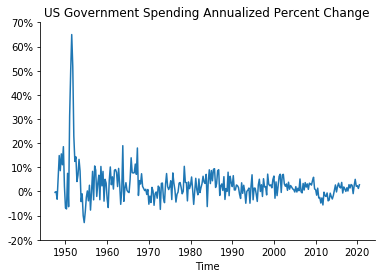

In [61]:
#plot Government pecent changed annualized
plt.plot(df_BEA['government_spending_percent_delta'])
plt.title('US Government Spending Annualized Percent Change')
plt.xlabel('Time')
locs, labels = plt.yticks() 
plt.yticks(locs, ['-20%', '-10%', '0%', '10%', '20%', '30%','40%', '50%','60%','70%']);
locs

In [62]:
df_BEA.head(10)

,gdp,consumption,investment,Exports,Imports,government_spending,Residual,gdp_percent_delta,consumption_pct_delta,investment_pct_delta,Exports_percent_delta,Imports_percent_delta,government_spending_percent_delta,gdp_percent_2delta,consumption_pct_2delta,investment_pct_2delta,Exports_pct_2delta,government_spending_pct_2delta,negative_growth
TimePeriod,,,,,,,,,,,,,,,,,,,
1947-03-31,2033061.0,1274952.0,218091.0,97759.0,60271.0,524076.0,-28008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-06-30,2027639.0,1296163.0,201386.0,96526.0,61432.0,523632.0,-24154.0,-1.062506,6.822599,-27.294690,-4.950412,7.930709,-0.338452,NaN,NaN,NaN,NaN,NaN,1.0
1947-09-30,2023452.0,1300388.0,195461.0,91627.0,54482.0,523527.0,-15586.0,-0.823430,1.310237,-11.259195,-18.807366,-38.136634,-0.080185,-0.225711,-0.804071,-0.615895,3.023989,-0.763313,1.0
1947-12-31,2055103.0,1300801.0,233284.0,81245.0,57419.0,519285.0,-19169.0,6.405174,0.127100,102.908083,-38.185167,23.370218,-3.201913,-8.574992,-0.902566,-7.577135,1.232515,39.408103,0.0
1948-03-31,2086017.0,1307283.0,257220.0,77539.0,64749.0,527020.0,-32899.0,6.154156,2.008182,47.801596,-17.035135,61.699904,6.092645,-0.038328,14.689932,-0.469762,-0.597421,-2.838328,0.0
1948-06-30,2120450.0,1322494.0,273138.0,70290.0,67316.0,545609.0,-51544.0,6.767917,4.736097,27.148009,-32.470522,16.826387,14.872934,0.097325,1.335017,-0.396861,1.049506,1.367960,0.0
1948-09-30,2132598.0,1324446.0,275936.0,71943.0,70831.0,556992.0,-58351.0,2.311357,0.591708,4.160956,9.743802,22.580189,8.609979,-0.652928,-0.873148,-0.834468,-1.251548,-0.408512,0.0
1948-12-31,2134981.0,1335016.0,262741.0,69407.0,69682.0,577508.0,-65127.0,0.447716,3.230697,-17.798842,-13.371874,-6.332499,15.567625,-0.804953,4.406978,-5.668049,-2.498930,0.765503,0.0
1949-03-31,2105562.0,1337177.0,223507.0,77714.0,67592.0,592826.0,-55507.0,-5.398923,0.649057,-47.633551,57.175177,-11.468309,11.039360,-13.331583,-0.797172,2.122725,-4.395316,-0.279888,1.0


# Cleaning BLS

I need to change the index to datetime. I will also need to convert the monthly data to quarterly data. The period name column will be dropped form the data.

In [63]:
#Dtypes BLS
df_BLS.dtypes

year                                         int64
period                                      object
periodName                                  object
unemployment_rate                          float64
employed                                     int64
Unemployed                                   int64
civilian_labor_force                         int64
civilian_labor_force_participation_rate    float64
dtype: object

In [64]:
df_BLS.isnull().sum()

year                                       0
period                                     0
periodName                                 0
unemployment_rate                          0
employed                                   0
Unemployed                                 0
civilian_labor_force                       0
civilian_labor_force_participation_rate    0
dtype: int64

In [65]:
#Function to convert dateframe items to string
def to_str(x):
    return str(x)

In [66]:
#converting years to str
df_BLS['year'] = df_BLS['year'].map(to_str)

In [67]:
#creating a Time Period column
df_BLS['TimePeriod'] = df_BLS['year'] + df_BLS['period']

In [68]:
#dropping Yera period and period name
df_BLS.drop(columns=['year','period','periodName'], inplace=True)

In [69]:
#Function to convert Ms to there end data.
def to_m_end_date(x):
    if x[-3:] == 'M01':
        return x.replace('M01','-01-31')
    elif x[-3:] == 'M02':
        return x.replace('M02','-02-28')
    elif x[-3:] == 'M03':
        return x.replace('M03','-03-31')
    elif x[-3:] == 'M04':
        return x.replace('M04','-04-30')
    elif x[-3:] == 'M05':
        return x.replace('M05','-05-31')
    elif x[-3:] == 'M06':
        return x.replace('M06','-06-30')
    elif x[-3:] == 'M07':
        return x.replace('M07','-07-31')
    elif x[-3:] == 'M08':
        return x.replace('M08','-08-31')
    elif x[-3:] == 'M09':
        return x.replace('M09','-09-30')
    elif x[-3:] == 'M10':
        return x.replace('M10','-10-31')
    elif x[-3:] == 'M11':
        return x.replace('M11','-11-30')
    elif x[-3:] == 'M12':
        return x.replace('M12','-12-31')
    else:
        return x 

In [70]:
df_BLS['TimePeriod'] = df_BLS['TimePeriod'].map(to_m_end_date)

In [71]:
# Change date column to be datetime dtype
df_BLS['TimePeriod'] = pd.to_datetime(df_BLS['TimePeriod'])

In [72]:
# Set TimePeriod to be in the index
df_BLS.set_index('TimePeriod',inplace = True)

In [73]:
# Sort the index
df_BLS.sort_index(inplace=True)

In [74]:
#Converting to quaters and taking the number for that month. 
df_BLS = df_BLS.resample('Q').last()

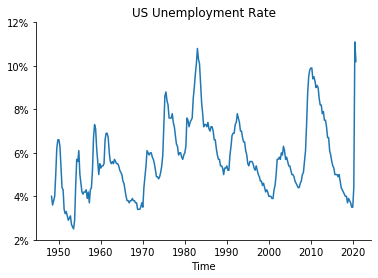

In [75]:
#plot unemployment rate
plt.plot(df_BLS['unemployment_rate'])
plt.title('US Unemployment Rate')
plt.xlabel('Time')
locs, labels = plt.yticks()
plt.yticks(locs, ['2%', '4%', '6%', '8%', '10%', '12%']);


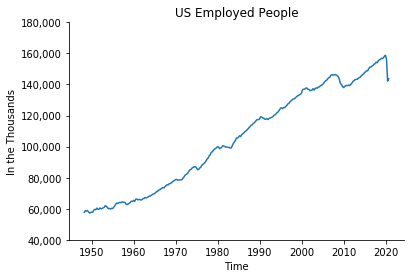

In [76]:
#plot employed people
plt.plot(df_BLS['employed'])
plt.title('US Employed People')
plt.xlabel('Time')
locs, labels = plt.yticks()
plt.yticks(locs, ['40,000',  '60,000',  '80,000', '100,000', '120,000', '140,000', '160,000','180,000'])
plt.ylabel('In the Thousands');

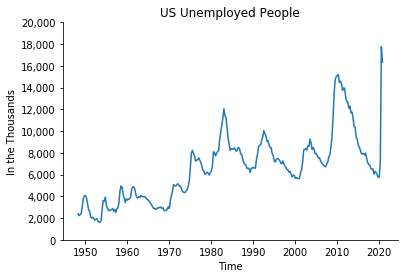

In [77]:
#plot unemployment rate
plt.plot(df_BLS['Unemployed'])
plt.title('US Unemployed People')
plt.xlabel('Time')
locs, labels = plt.yticks()
plt.yticks(locs, ['0',  '2,000',  '4,000',  '6,000',  '8,000', '10,000', '12,000', '14,000','16,000', '18,000', '20,000'])
plt.ylabel('In the Thousands');

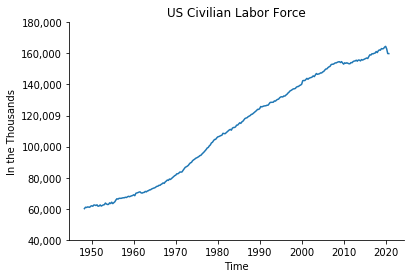

In [78]:
#plot unemployment rate
plt.plot(df_BLS['civilian_labor_force'])
plt.title('US Civilian Labor Force')
plt.xlabel('Time')
locs, labels = plt.yticks()
plt.yticks(locs, ['40,000',  '60,000',  '80,000', '100,000', '120,009', '140,000', '160,000','180,000'])
plt.ylabel('In the Thousands');

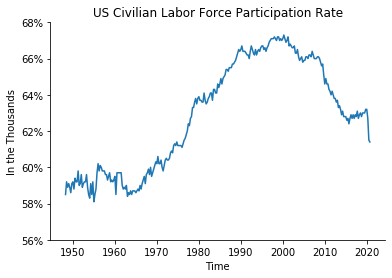

In [79]:
#plot unemployment rate
plt.plot(df_BLS['civilian_labor_force_participation_rate'])
plt.title('US Civilian Labor Force Participation Rate')
plt.xlabel('Time')
locs, labels = plt.yticks()
plt.yticks(locs, ['56%', '58%', '60%', '62%', '64%', '66%', '68%'])
plt.ylabel('In the Thousands');

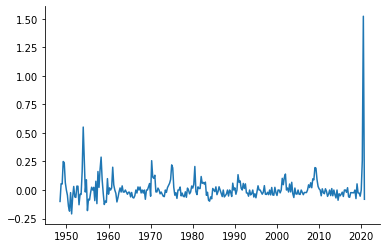

In [80]:
plt.plot(df_BLS['unemployment_rate'].pct_change())

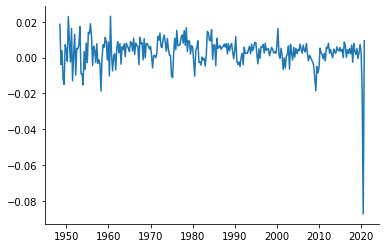

In [81]:
plt.plot(df_BLS['employed'].pct_change())

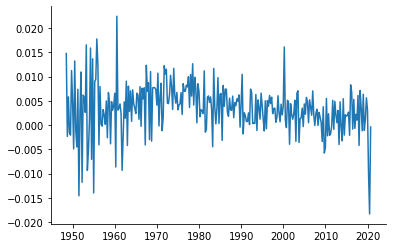

In [82]:
plt.plot(df_BLS['civilian_labor_force'].pct_change())

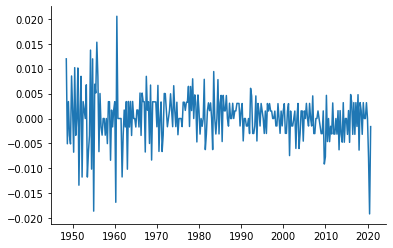

In [83]:
plt.plot(df_BLS['civilian_labor_force_participation_rate'].pct_change())

In [85]:
#  Percent chnage for unemplolyment rate
df_BLS['unemployment_rate_percent_delta'] = df_BLS['unemployment_rate'].pct_change()

In [88]:
#Percent change of employed people
df_BLS['employed_percent_delta'] = df_BLS['employed'].pct_change()

In [89]:
#Percent change of Unemployed people
df_BLS['Unemployed_percent_delta'] = df_BLS['Unemployed'].pct_change()

In [92]:
#Percent change of Civilian Labor Force people
df_BLS['civilian_labor_force_percent_delta'] = df_BLS['civilian_labor_force'].pct_change()

In [94]:
#Percent change of Civilian Labor Force people
df_BLS['civilian_labor_force_participation_rate_percent_delta'] = df_BLS['civilian_labor_force_participation_rate'].pct_change()

In [95]:
df_BLS.head(12)

,unemployment_rate,employed,Unemployed,civilian_labor_force,civilian_labor_force_participation_rate,unemployment_rate_percent_delta,employed_percent_delta,Unemployed_percent_delta,civilian_labor_force_percent_delta,civilian_labor_force_participation_rate_percent_delta
TimePeriod,,,,,,,,,,
1948-03-31,4.0,57671,2399,60070,58.5,NaN,NaN,NaN,NaN,NaN
1948-06-30,3.6,58743,2214,60957,59.2,-0.100000,0.018588,-0.077115,0.014766,0.011966
1948-09-30,3.8,58513,2302,60815,58.9,0.055556,-0.003915,0.039747,-0.002330,-0.005068
1948-12-31,4.0,58740,2429,61169,59.1,0.052632,0.003879,0.055169,0.005821,0.003396
1949-03-31,5.0,58043,3030,61073,58.9,0.250000,-0.011866,0.247427,-0.001569,-0.003384
1949-06-30,6.2,57172,3776,60948,58.6,0.240000,-0.015006,0.246205,-0.002047,-0.005093
1949-09-30,6.6,57584,4049,61633,59.1,0.064516,0.007206,0.072299,0.011239,0.008532
1949-12-31,6.6,57845,4063,61908,59.2,0.000000,0.004533,0.003458,0.004462,0.001692
1950-03-31,6.3,57728,3876,61604,58.8,-0.045455,-0.002023,-0.046025,-0.004911,-0.006757


In [99]:
df = df_BEA.merge(df_BLS,how='left', left_index=True, right_index=True)

In [100]:
df.to_csv('../data/clean.csv', index = True)